In [1]:
from IPython.display import display, Math, Latex

In [2]:
mu = var('mu')
assume(mu, 'real')
assume(mu>0)

epsilon = var('epsilon')
assume(epsilon, 'real')
assume(epsilon>0)

s = var ('s')
assume(s, 'real')
assume(s>0)

kappa = var ('kappa')
assume(kappa, 'real')
assume(kappa>0)

k = var ('k')
assume(k, 'real')

a = var('a')
assume(a, 'real')
assume(a>0)

x = var('x')
y = var('y')
z = var('z')
t = var('t')

assume(x, 'real')
assume(y, 'real')
assume(z, 'real')
assume(t, 'real')

c = var('c')
assume(c, 'real')
assume(c>0)

omega = var('omega')
assume(omega, 'real')

alpha = var('alpha')
assume(alpha, 'real')

sigma = var('sigma')
assume(sigma, 'real')

H_0 = var('H_0')

In [3]:
delta = c / sqrt(2*pi*sigma*omega)
display(Math(latex(delta)))

<IPython.core.display.Math object>

In [4]:
H_y(x) = H_0 * exp(-x/delta) * cos(x/delta - omega * t)
display(Math(latex(H_y(x))))

<IPython.core.display.Math object>

In [5]:
E_z(x) = H_0 * sqrt(omega/(4*pi*sigma)) * exp(-x/delta) * cos(x/delta - omega * t - pi/4)
display(Math(latex(E_z(x))))

<IPython.core.display.Math object>

In [6]:
j_z(x) = sigma * E_z(x)
display(Math(latex(j_z(x))))

<IPython.core.display.Math object>

In [7]:
# Abraham force
# (epsilon * mu - 1) / (4 * pi * c) * ([E x H]).diff(t)
# (epsilon * mu - 1) / (4 * pi * c) * ([E.diff(t) x H] + [E x H.diff(t)])
# ([a x b])_x = a_y * b_z - a_z * b_y
# f_x = (epsilon * mu - 1) / (4 * pi * c) * (-E_z.diff(t) * H_y - E_z * H_y.diff(t))

#
# alpha = - omega * t
#

# f_x = (epsilon * mu - 1) / (4 * pi * c) * 
#       integrate(
#         ( - Re(-I*omega * E_z * e^alpha) * Re(H_y * e^alpha)) +
#         ( - Re(E_z * e^alpha) * Re(-I*omega * H_y * e^alpha)) 
#       (alpha, 0, 2*pi))


# f_x = (epsilon * mu - 1) / (2 * 4 * pi * c) * (
#             ( - Re(-I*omega * E_z) * Re(H_y) - Im(-I*omega * E_z) * Im(H_y)) +
#             ( - Re(E_z) * Re(-I*omega * H_y) - Im(E_z) * Im(-I*omega * H_y)) 
#       )

f_x(x) = 1 / c * j_z(x) * H_y(x) 
print("f_x =", f_x(x))
display(Math(latex(f_x(x))))

f_x = 1/2*H_0^2*sigma*sqrt(omega/(pi*sigma))*cos(-1/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega*sigma)*x/c)*cos(-omega*t + sqrt(2)*sqrt(pi)*sqrt(omega*sigma)*x/c)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/c


<IPython.core.display.Math object>

In [8]:
exec(preparse("f_x_s(x) = " + str(f_x(x)).replace('omega*t', 'alpha')))
f_x_s(x)

1/2*H_0^2*sigma*sqrt(omega/(pi*sigma))*cos(-1/4*pi + sqrt(2)*sqrt(pi)*sqrt(omega*sigma)*x/c - alpha)*cos(sqrt(2)*sqrt(pi)*sqrt(omega*sigma)*x/c - alpha)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/c

In [9]:
F_x(x) = integrate(f_x_s(x), (alpha, 0, 2*pi))
display(Math(latex(F_x(x))))

<IPython.core.display.Math object>

In [47]:
Au_sigma_SI = 42.2 * 10^6 # Sm/m
Au_sigma_sgse = 9*10^9 * Au_sigma_SI
digit_values = [sigma == Au_sigma_sgse, c == 299792458 * 100 , epsilon == 1, mu == 1, H_0 == 1, omega == 2.98046134067856e15]
F_x_d(x) = F_x(x).subs(digit_values)
display(Math(latex(F_x_d(x))))

<IPython.core.display.Math object>

In [48]:
delta .subs(digit_values).n()

3.55477029224551e-7

In [49]:
# мкм
delta .subs(digit_values).n()*10*1000 

0.00355477029224551

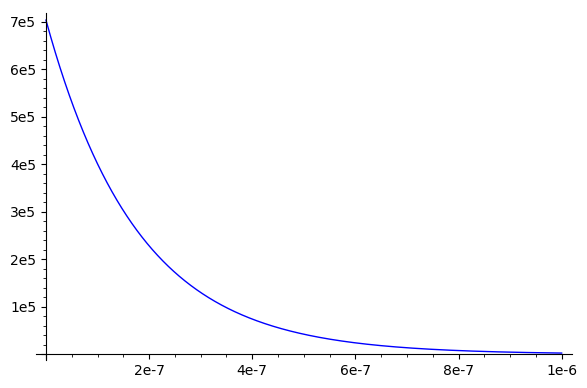

In [52]:
plot(F_x_d(x), (x, 0, 0.000001))

In [53]:
int_F_x(x) = integrate(F_x(x), x)

In [54]:
int_F_x(x)

-1/64*(8*pi*c*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/sqrt(pi*omega*sigma) + (sqrt(2)*sqrt(pi)*sqrt(omega*sigma)*cos(-1/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega*sigma)*x/c)/c + sqrt(2)*sqrt(pi*omega*sigma)*sin(-1/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega*sigma)*x/c)/c)*c^2*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/(pi*omega*sigma) - (sqrt(2)*sqrt(pi)*sqrt(omega*sigma)*cos(-17/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega*sigma)*x/c)/c + sqrt(2)*sqrt(pi*omega*sigma)*sin(-17/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega*sigma)*x/c)/c)*c^2*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/(pi*omega*sigma))*H_0^2*sigma*sqrt(omega/(pi*sigma))/c

In [55]:
int_F_x_d(x) = int_F_x(x).subs(digit_values)
display(Math(latex(int_F_x_d(x))))

<IPython.core.display.Math object>

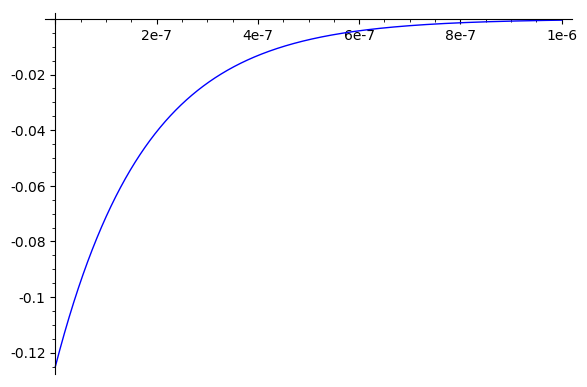

In [57]:
plot(int_F_x_d(x), (x, 0, 0.000001))

In [58]:
int_F_x_d(0)

-0.125000000000000

In [59]:
int_F_x_d(0.001).n()

0

In [60]:
F(x) = -int_F_x(0)

In [61]:
display(Math(latex(F(x).full_simplify())))

<IPython.core.display.Math object>

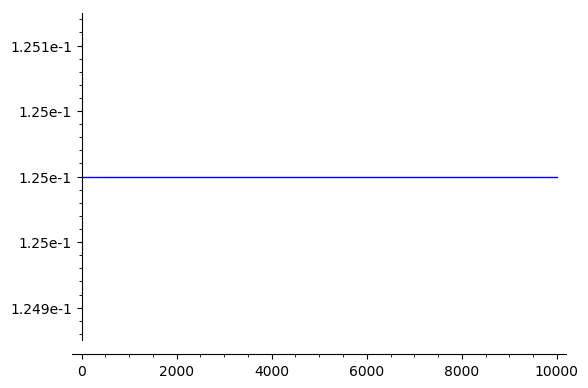

In [63]:
digit_values2 = [c == 299792458 * 100 , epsilon == 1, mu == 1, H_0 == 1, omega == 1000]
plot(F(x).subs(digit_values2), sigma, 1, 10000)